In [1]:
library(tidyverse)
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
manhattanDistance <- function(vect1, vect2){
     dist <- abs(vect1 - vect2)
     dist <- sum(dist)
     return(dist)
}

In [5]:
tbl <- read_csv("enriched_bit_score_cosine_sim_density/per_species_enriched.csv")

Rows: 110401 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): s1.species_scientific_name, c.cell_type_name, og.id, og.eggnog_data...
dbl (1): enr.specificity_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
head(tbl)

s1.species_scientific_name,c.cell_type_name,og.id,og.eggnog_dataset_name,g.external_gene_name,g.id,g.ensembl_peptide_id,enr.specificity_score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
cjacchus,L2/3 intratelencephalic projecting glutamatergic neuron,9G5A4,vertebrata,NELL1,ENSCJAG00000034303,ENSCJAP00000068199,4.338157
cjacchus,L2/3 intratelencephalic projecting glutamatergic neuron,HSY91,metazoa,NELL1,ENSCJAG00000034303,ENSCJAP00000068199,4.338157
cjacchus,L2/3 intratelencephalic projecting glutamatergic neuron,8YXGD,mammalia,NELL1,ENSCJAG00000034303,ENSCJAP00000068199,4.338157
cjacchus,L2/3 intratelencephalic projecting glutamatergic neuron,H4QFH,bilateria,NELL1,ENSCJAG00000034303,ENSCJAP00000068199,4.338157
cjacchus,L2/3 intratelencephalic projecting glutamatergic neuron,4ZJ0E,primates,NELL1,ENSCJAG00000034303,ENSCJAP00000068199,4.338157
cjacchus,L2/3 intratelencephalic projecting glutamatergic neuron,9FEF2,vertebrata,KCNIP4,ENSCJAG00000012939,ENSCJAP00000064171,4.390645


tbl %>% select(g.id) %>% unique() %>% write_csv("all_gene_ids.csv")

In [7]:
tbl %>% filter(s1.species_scientific_name == 'cjacchus') %>% 
filter(og.eggnog_dataset_name == 'primates') %>% 
unique() %>% 
filter(g.external_gene_name == 'ABCA6' )

# can have one protein in two ogs

s1.species_scientific_name,c.cell_type_name,og.id,og.eggnog_dataset_name,g.external_gene_name,g.id,g.ensembl_peptide_id,enr.specificity_score
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
cjacchus,microglial cell,504IZ,primates,ABCA6,ENSCJAG00000000190,ENSCJAP00000000328,5.00471
cjacchus,microglial cell,4ZNHS,primates,ABCA6,ENSCJAG00000000190,ENSCJAP00000000328,5.00471


In [8]:
species_1 = 'cjacchus'
species_2 = 'mmulatta'

species_1_short = 'cj'
species_2_short = 'mm'

In [9]:
cj_tbl = tbl %>% filter(s1.species_scientific_name == species_1) %>% 
filter(og.eggnog_dataset_name == 'primates') %>% 
unique() %>% 
pivot_wider(id_cols = c(g.external_gene_name, og.id, g.ensembl_peptide_id), names_from = c.cell_type_name, values_from = enr.specificity_score, values_fn = first, values_fill = 0) %>% 
arrange(og.id)

In [10]:
mm_tbl = tbl %>% filter(s1.species_scientific_name == species_2) %>% 
filter(og.eggnog_dataset_name == 'primates') %>% 
unique() %>% 
pivot_wider(id_cols = c(g.external_gene_name, og.id, g.ensembl_peptide_id), names_from = c.cell_type_name, values_from = enr.specificity_score, values_fn = first, values_fill = 0)%>% 
arrange(og.id)

In [11]:
og_shared = intersect(cj_tbl$og.id, mm_tbl$og.id)

In [12]:
cj_tbl_shared = cj_tbl  %>% filter(og.id %in% og_shared)

In [13]:
mm_tbl_shared = mm_tbl %>% filter(og.id %in% og_shared)

In [14]:
library(lsa)

Loading required package: SnowballC



In [15]:
cj_tbl_shared_t = t(cj_tbl_shared)
colnames(cj_tbl_shared_t) = cj_tbl_shared_t['g.ensembl_peptide_id', ]
head(cj_tbl_shared_t)

,ENSCJAP00000070692,ENSCJAP00000037232,ENSCJAP00000036091,ENSCJAP00000059468,ENSCJAP00000017327,ENSCJAP00000037303,ENSCJAP00000068560,ENSCJAP00000053698,ENSCJAP00000019444,ENSCJAP00000026616,ENSCJAP00000072315,ENSCJAP00000031438,ENSCJAP00000073448,ENSCJAP00000002737,ENSCJAP00000009377,ENSCJAP00000019761,ENSCJAP00000040036,ENSCJAP00000035132,ENSCJAP00000063178,ENSCJAP00000070809,ENSCJAP00000021118,ENSCJAP00000003405,ENSCJAP00000067388,ENSCJAP00000019513,ENSCJAP00000035504,⋯,ENSCJAP00000038287,ENSCJAP00000061019,ENSCJAP00000053684,ENSCJAP00000003795,ENSCJAP00000026537,ENSCJAP00000015599,ENSCJAP00000008280,ENSCJAP00000019706,ENSCJAP00000065728,ENSCJAP00000034692,ENSCJAP00000012767,ENSCJAP00000046258,ENSCJAP00000022399,ENSCJAP00000024530,ENSCJAP00000049508,ENSCJAP00000078424,ENSCJAP00000077793,ENSCJAP00000079090,ENSCJAP00000009052,ENSCJAP00000025158,ENSCJAP00000038948,ENSCJAP00000029450,ENSCJAP00000068955,ENSCJAP00000010180,ENSCJAP00000053121
g.external_gene_name,SLC38A5,IQGAP2,ICAM2,LMO2,CPAMD8,PHYHD1,NID1,DNASE1L3,KLHL4,RGS20,LYVE1,ADAMTS17,QDPR,PLSCR5,ADAMTS4,KANK3,KIAA1755,CTSZ,HEPH,ALPK1,TSPAN18,MYBPC1,CASP10,DOCK8,NMBR,⋯,PRKCQ,DLL4,CD53,IL6ST,SLC4A4,SLC39A12,OLFML2B,RGS19,ACOT11,MEDAG,KIF13A,HSPG2,ADORA2B,PIPOX,ANPEP,SDS,NKAIN3,FAM151A,PREX2,CEBPD,DOCK9,CD180,MYOF,WWC2,VEGFC
og.id,4ZIG5,4ZIH7,4ZIJB,4ZIKG,4ZIKU,4ZIKX,4ZIM7,4ZINK,4ZINT,4ZIRH,4ZIRK,4ZIRS,4ZIT6,4ZIU1,4ZIU5,4ZIUC,4ZIVW,4ZIWH,4ZIWP,4ZIWS,4ZIWW,4ZIWY,4ZIX6,4ZIX7,4ZIXQ,⋯,5052S,5053A,5053Z,5055Y,50569,5056G,5056J,50575,5057F,5057J,505CA,505CH,505CU,505DV,505E0,505E8,505G7,505GK,505HF,505IX,505J6,505NN,505PA,505PK,505PP
g.ensembl_peptide_id,ENSCJAP00000070692,ENSCJAP00000037232,ENSCJAP00000036091,ENSCJAP00000059468,ENSCJAP00000017327,ENSCJAP00000037303,ENSCJAP00000068560,ENSCJAP00000053698,ENSCJAP00000019444,ENSCJAP00000026616,ENSCJAP00000072315,ENSCJAP00000031438,ENSCJAP00000073448,ENSCJAP00000002737,ENSCJAP00000009377,ENSCJAP00000019761,ENSCJAP00000040036,ENSCJAP00000035132,ENSCJAP00000063178,ENSCJAP00000070809,ENSCJAP00000021118,ENSCJAP00000003405,ENSCJAP00000067388,ENSCJAP00000019513,ENSCJAP00000035504,⋯,ENSCJAP00000038287,ENSCJAP00000061019,ENSCJAP00000053684,ENSCJAP00000003795,ENSCJAP00000026537,ENSCJAP00000015599,ENSCJAP00000008280,ENSCJAP00000019706,ENSCJAP00000065728,ENSCJAP00000034692,ENSCJAP00000012767,ENSCJAP00000046258,ENSCJAP00000022399,ENSCJAP00000024530,ENSCJAP00000049508,ENSCJAP00000078424,ENSCJAP00000077793,ENSCJAP00000079090,ENSCJAP00000009052,ENSCJAP00000025158,ENSCJAP00000038948,ENSCJAP00000029450,ENSCJAP00000068955,ENSCJAP00000010180,ENSCJAP00000053121
L2/3 intratelencephalic projecting glutamatergic neuron,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L4 intratelencephalic projecting glutamatergic neuron,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L5 extratelencephalic projecting glutamatergic cortical neuron,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [16]:
cj_tbl_shared_t = cj_tbl_shared_t[4:nrow(cj_tbl_shared_t), ]

In [17]:
mm_tbl_shared_t = t(mm_tbl_shared)
colnames(mm_tbl_shared_t) = mm_tbl_shared_t['g.ensembl_peptide_id', ]
mm_tbl_shared_t = mm_tbl_shared_t[4:nrow(mm_tbl_shared_t), ]

In [18]:
as.numeric(unname(cj_tbl_shared_t[, 1]))

[1] 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
 [9] 4.278848 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
[17] 0.000000 0.000000 0.000000 0.000000 0.000000

In [19]:
as.numeric(unname(mm_tbl_shared_t[, 1]))

[1]   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
 [9] 221.3135   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
[17]   0.0000   0.0000   0.0000   0.0000   0.0000

In [20]:
og_gene_mapping = cj_tbl_shared %>% select(g.external_gene_name, g.ensembl_peptide_id, og.id) %>% 
merge(mm_tbl_shared %>% select(g.external_gene_name, g.ensembl_peptide_id, og.id), by = 'og.id', suffixes = c("_cj", "_mm"), all = TRUE) 

In [21]:
head(og_gene_mapping)

,og.id,g.external_gene_name_cj,g.ensembl_peptide_id_cj,g.external_gene_name_mm,g.ensembl_peptide_id_mm
,<chr>,<chr>,<chr>,<chr>,<chr>
1,4ZIG5,SLC38A5,ENSCJAP00000070692,SLC38A5,ENSMMUP00000022328
2,4ZIH7,IQGAP2,ENSCJAP00000037232,IQGAP2,ENSMMUP00000065060
3,4ZIJB,ICAM2,ENSCJAP00000036091,ICAM2,ENSMMUP00000019231
4,4ZIKG,LMO2,ENSCJAP00000059468,LMO2,ENSMMUP00000010027
5,4ZIKU,CPAMD8,ENSCJAP00000017327,CPAMD8,ENSMMUP00000031763
6,4ZIKX,PHYHD1,ENSCJAP00000037303,PHYHD1,ENSMMUP00000039962


In [22]:
og_gene_mapping = og_gene_mapping %>% group_by(og.id) %>% 
mutate(n_genes_in_og_sp1 = length(unique(g.external_gene_name_cj))) %>% 
mutate(n_genes_in_og_sp2 = length(unique(g.external_gene_name_mm))) %>% 
mutate(orthology_type = case_when(n_genes_in_og_sp1 == 1 & n_genes_in_og_sp2 == 1 ~ 'O2O', 
                               n_genes_in_og_sp1 == 1 & n_genes_in_og_sp2 > 1 ~ 'O2M',
                                 n_genes_in_og_sp1 > 1 & n_genes_in_og_sp2 == 1 ~ 'M2O',
                                 n_genes_in_og_sp1 > 1 & n_genes_in_og_sp2 > 1 ~ 'M2M'))

In [23]:
gene_cj

[1] "ENSPTRP00000025591"

In [24]:
df_all = data.frame()

for(i in seq(1, nrow(og_gene_mapping))){

    gene_cj = og_gene_mapping[i, 'g.ensembl_peptide_id_cj']$g.ensembl_peptide_id_cj
    
    gene_mm = og_gene_mapping[i, 'g.ensembl_peptide_id_mm']$g.ensembl_peptide_id_mm

    orthology_type = og_gene_mapping[i, 'orthology_type']

    cosine = lsa::cosine(as.numeric(unname(cj_tbl_shared_t[, gene_cj])), as.numeric(unname(mm_tbl_shared_t[, gene_mm])))

    dot = as.numeric(unname(cj_tbl_shared_t[, gene_cj])) %*% as.numeric(unname(mm_tbl_shared_t[, gene_mm]))

    corr = cor(as.numeric(unname(cj_tbl_shared_t[, gene_cj])), as.numeric(unname(mm_tbl_shared_t[, gene_mm])), method = 'spearman')

    mand = manhattanDistance(as.numeric(unname(cj_tbl_shared_t[, gene_cj])), as.numeric(unname(mm_tbl_shared_t[, gene_mm])))

    df_add = data.frame(gene_mm = gene_mm, gene_cj = gene_cj, cosine = cosine, dot = dot, corr = corr, mand = mand, orthology_type = orthology_type)

    

    df_all = rbind(df_all, df_add)

    
}

In [25]:
df_all %>% group_by(orthology_type) %>% count()

orthology_type,n
<chr>,<int>
M2M,8
M2O,8
O2M,26
O2O,877


low_spec = read_csv("all_species_classes_subclass_1TPM_ensembl_name_lowspec_processed_all.csv")

head(low_spec)

low_spec %>% select(ensembl_gene_id) %>% unique() %>% write_csv("all_gene_ids_low_spec.csv")

df_nonspec = read_csv("all_gene_ids_low_spec.csv")
head(df_nonspec)

## get homology annot for low specificity genes and add to the following analysis

In [26]:
df_blast = read_tsv(paste0("/nfs/research/irene/ysong/RESULTS/BLAST/genespectra_MTG/", species_1_short, "_to_", species_2_short, ".txt"), col_names = NA)

Rows: 323561 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): X1, X2
dbl (10): X3, X4, X5, X6, X7, X8, X9, X10, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [27]:
head(df_blast)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSCJAP00000012613.5,ENSMMUP00000001401.4,94.167,120,7,0,1,120,1,120,2.45e-84,239
ENSCJAP00000012613.5,ENSMMUP00000001397.4,93.939,99,3,1,1,99,1,96,3.00e-65,191
ENSCJAP00000012613.5,ENSMMUP00000065012.1,93.939,99,3,1,1,99,1,96,3.00e-65,191
ENSCJAP00000012613.5,ENSMMUP00000018126.3,93.939,99,3,1,1,99,1,96,3.00e-65,191
ENSCJAP00000012613.5,ENSMMUP00000001398.4,97.802,91,2,0,12,102,24,114,5.19e-64,188
ENSCJAP00000012635.4,ENSMMUP00000001397.4,88.288,111,3,2,8,111,13,120,2.80e-66,194


In [28]:
df_blast_new = df_blast %>% 
mutate(mm_peptide_id = gsub("\\..$", "", X2))%>% 
mutate(cj_peptide_id = gsub("\\..$", "", X1))

In [29]:
head(df_blast_new )

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,mm_peptide_id,cj_peptide_id
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSCJAP00000012613.5,ENSMMUP00000001401.4,94.167,120,7,0,1,120,1,120,2.45e-84,239,ENSMMUP00000001401,ENSCJAP00000012613
ENSCJAP00000012613.5,ENSMMUP00000001397.4,93.939,99,3,1,1,99,1,96,3.00e-65,191,ENSMMUP00000001397,ENSCJAP00000012613
ENSCJAP00000012613.5,ENSMMUP00000065012.1,93.939,99,3,1,1,99,1,96,3.00e-65,191,ENSMMUP00000065012,ENSCJAP00000012613
ENSCJAP00000012613.5,ENSMMUP00000018126.3,93.939,99,3,1,1,99,1,96,3.00e-65,191,ENSMMUP00000018126,ENSCJAP00000012613
ENSCJAP00000012613.5,ENSMMUP00000001398.4,97.802,91,2,0,12,102,24,114,5.19e-64,188,ENSMMUP00000001398,ENSCJAP00000012613
ENSCJAP00000012635.4,ENSMMUP00000001397.4,88.288,111,3,2,8,111,13,120,2.80e-66,194,ENSMMUP00000001397,ENSCJAP00000012635


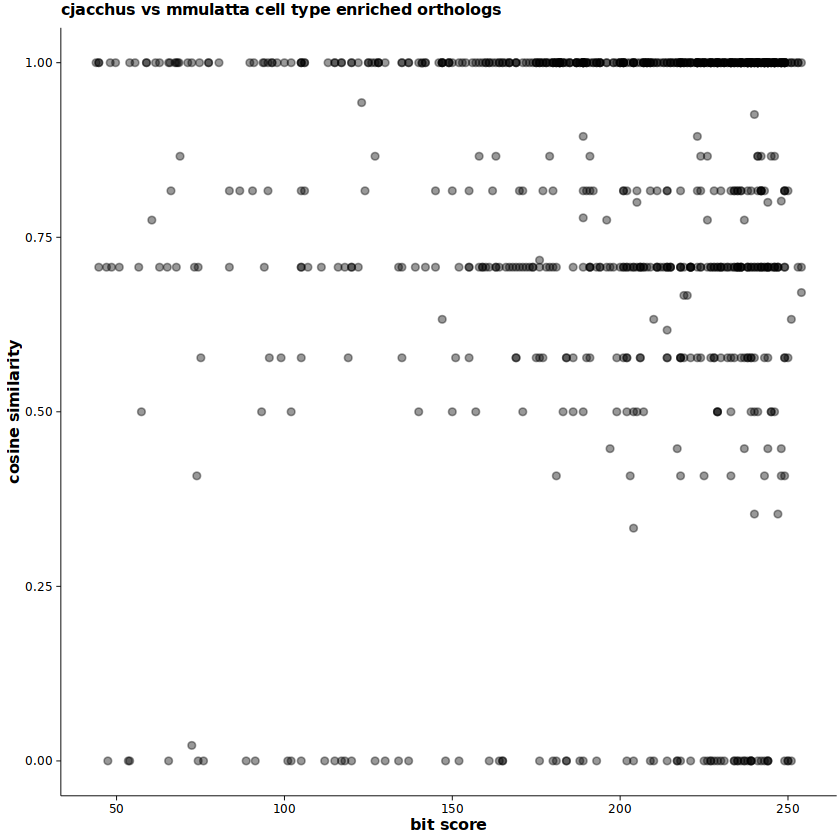

In [30]:
df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
ggplot(aes(x = X12, y = cosine)) + geom_point(alpha = 0.4) + common_0x +
labs(x = 'bit score', y = 'cosine similarity') + 
labs(title = paste0(species_1, " vs ", species_2 ," cell type enriched orthologs"))

Warning message:
“Transformation introduced infinite values in continuous y-axis”


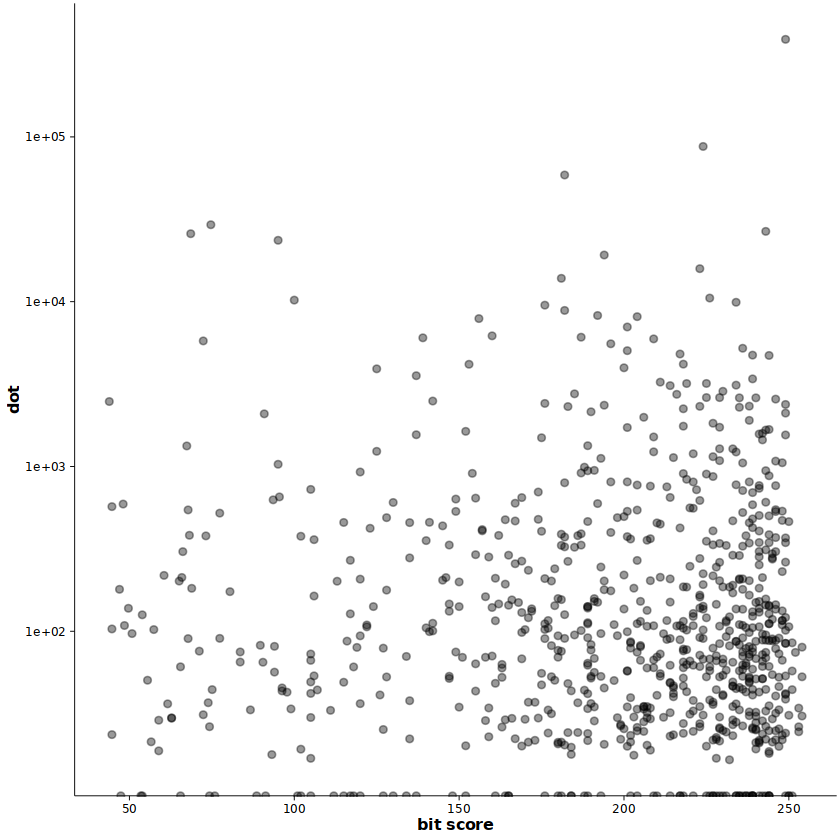

In [31]:
df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
ggplot(aes(x = X12, y = dot)) + geom_point(alpha = 0.4) + common_0x + scale_y_log10() +
labs(x = 'bit score')

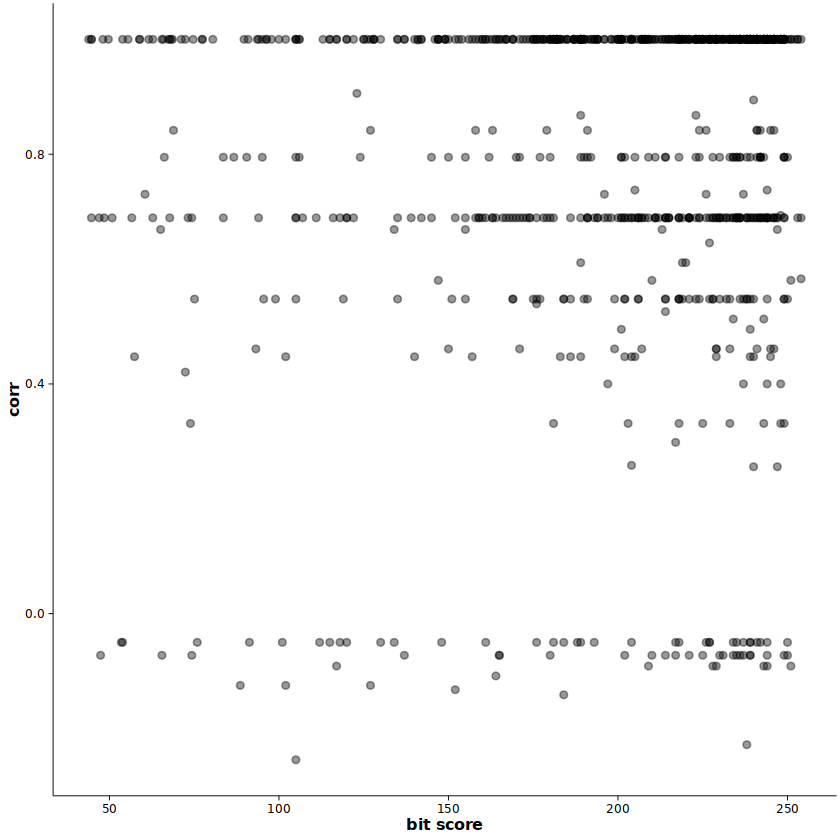

In [32]:
df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
ggplot(aes(x = X12, y = corr)) + geom_point(alpha = 0.4) + common_0x  +
labs(x = 'bit score')

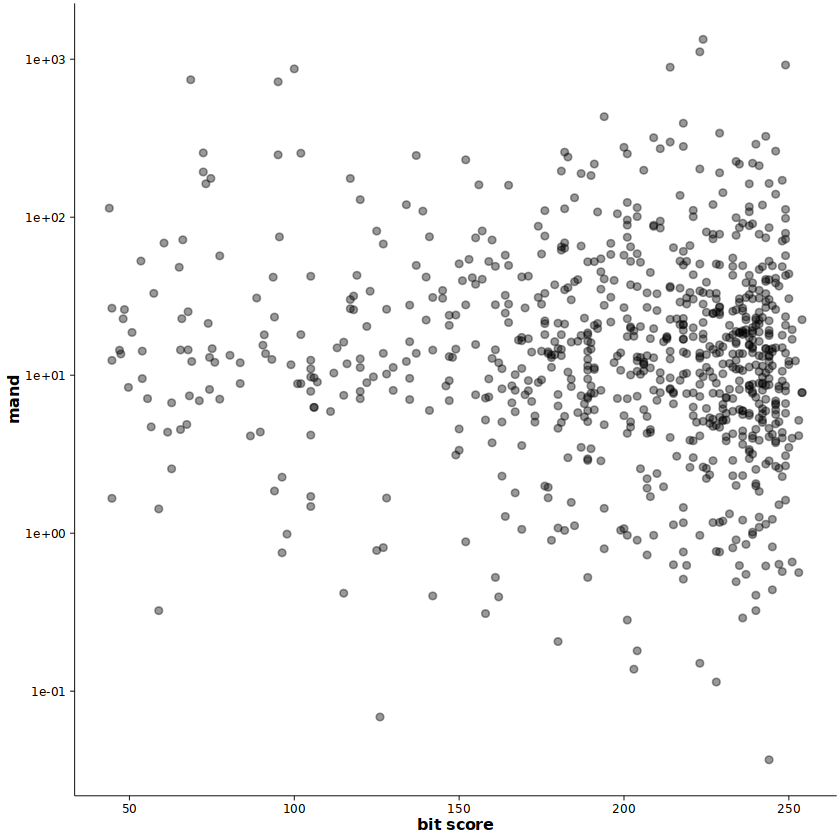

In [33]:
df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
ggplot(aes(x = X12, y = mand)) + geom_point(alpha = 0.4) + common_0x +
labs(x = 'bit score') + scale_y_log10() 

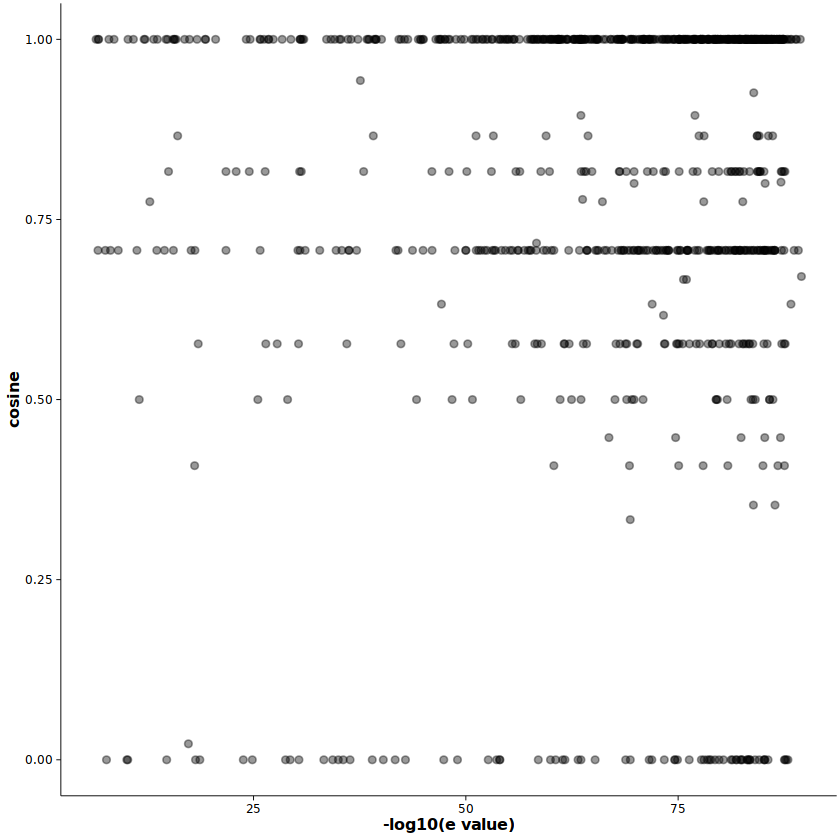

In [34]:
df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
ggplot(aes(x = -log10(X11), y = cosine)) + geom_point(alpha = 0.4) + common_0x +
labs(x = '-log10(e value)')

Warning message:
“Transformation introduced infinite values in continuous y-axis”


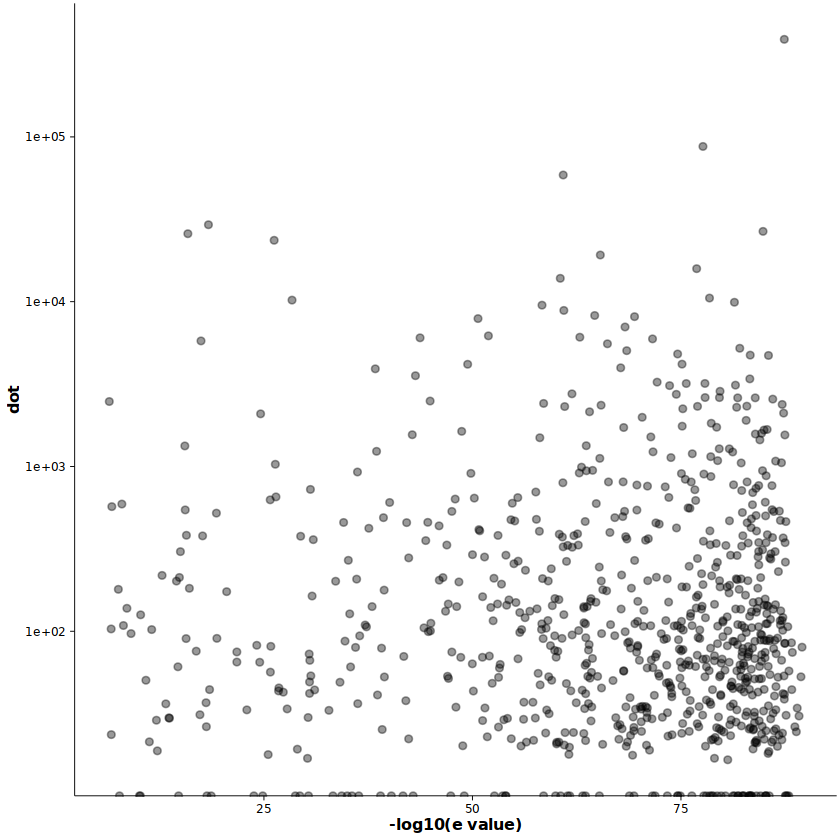

In [35]:
df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
ggplot(aes(x = -log10(X11), y = dot)) + geom_point(alpha = 0.4) + common_0x + scale_y_log10() +
labs(x = '-log10(e value)')

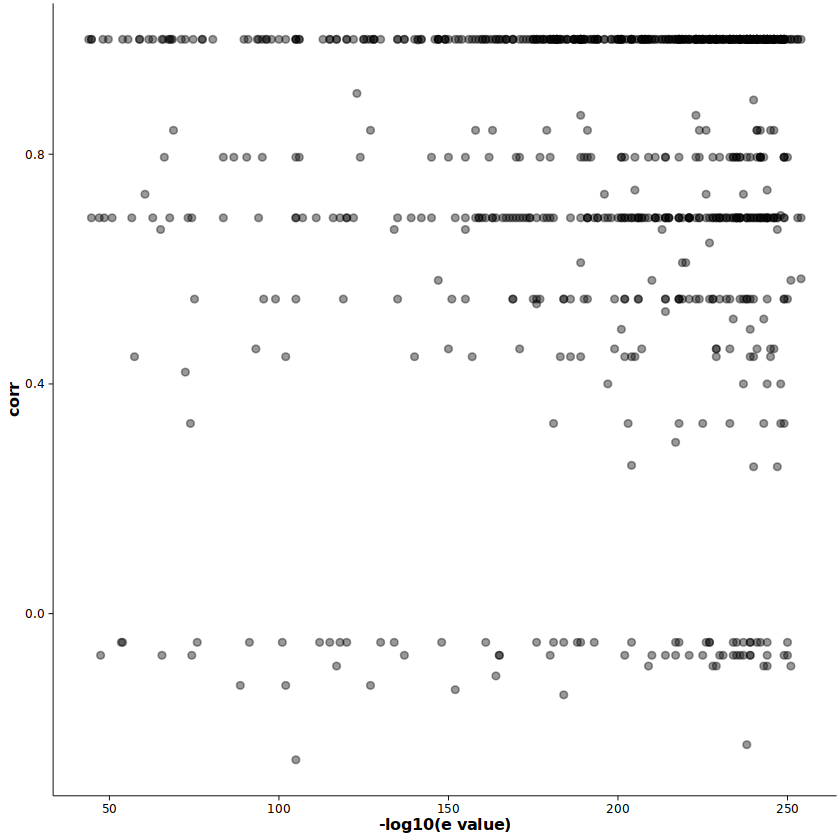

In [36]:
df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
ggplot(aes(x = X12, y = corr)) + geom_point(alpha = 0.4) + common_0x  +
labs(x = '-log10(e value)')

In [37]:

all_pairs <- data.frame(
  species_1 = c('cjacchus', 'cjacchus', 'cjacchus', 'cjacchus', 'mmulatta', 'mmulatta', 'mmulatta', 'ggorilla', 'ggorilla', 'ptroglodytes', 'ptroglodytes'),
  species_2 = c('mmulatta', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ptroglodytes', 'hsapiens', 'hsapiens', 'hsapiens')
)

# Iterate over rows and assign values to species_1 and species_2
for (i in 1:nrow(all_pairs)) {
    species_1 <- all_pairs[i, 'species_1']
    species_2 <- all_pairs[i, 'species_2']

                        
 

species_1_short = substr(species_1, start = 1, stop = 2)
species_2_short = substr(species_2, start = 1, stop = 2)

            message(species_1)
            message(species_2)

cj_tbl = tbl %>% filter(s1.species_scientific_name == species_1) %>% 
filter(og.eggnog_dataset_name == 'primates') %>% 
unique() %>% 
pivot_wider(id_cols = c(g.external_gene_name, og.id, g.ensembl_peptide_id), names_from = c.cell_type_name, values_from = enr.specificity_score, values_fn = first, values_fill = 0) %>% 
arrange(og.id)

mm_tbl = tbl %>% filter(s1.species_scientific_name == species_2) %>% 
filter(og.eggnog_dataset_name == 'primates') %>% 
unique() %>% 
pivot_wider(id_cols = c(g.external_gene_name, og.id, g.ensembl_peptide_id), names_from = c.cell_type_name, values_from = enr.specificity_score, values_fn = first, values_fill = 0)%>% 
arrange(og.id)

og_shared = intersect(cj_tbl$og.id, mm_tbl$og.id)

cj_tbl_shared = cj_tbl  %>% filter(og.id %in% og_shared)

mm_tbl_shared = mm_tbl %>% filter(og.id %in% og_shared)

cj_tbl_shared_t = t(cj_tbl_shared)
colnames(cj_tbl_shared_t) = cj_tbl_shared_t['g.ensembl_peptide_id', ]
cj_tbl_shared_t = cj_tbl_shared_t[4:nrow(cj_tbl_shared_t), ]

mm_tbl_shared_t = t(mm_tbl_shared)
colnames(mm_tbl_shared_t) = mm_tbl_shared_t['g.ensembl_peptide_id', ]
mm_tbl_shared_t = mm_tbl_shared_t[4:nrow(mm_tbl_shared_t), ]


og_gene_mapping = cj_tbl_shared %>% select(g.external_gene_name, g.ensembl_peptide_id, og.id) %>% 
merge(mm_tbl_shared %>% select(g.external_gene_name, g.ensembl_peptide_id, og.id), by = 'og.id', suffixes = c("_cj", "_mm"), all = TRUE) 

og_gene_mapping = og_gene_mapping %>% group_by(og.id) %>% 
mutate(n_genes_in_og_sp1 = length(unique(g.external_gene_name_cj))) %>% 
mutate(n_genes_in_og_sp2 = length(unique(g.external_gene_name_mm))) %>% 
mutate(orthology_type = case_when(n_genes_in_og_sp1 == 1 & n_genes_in_og_sp2 == 1 ~ 'O2O', 
                               n_genes_in_og_sp1 == 1 & n_genes_in_og_sp2 > 1 ~ 'O2M',
                                 n_genes_in_og_sp1 > 1 & n_genes_in_og_sp2 == 1 ~ 'M2O',
                                 n_genes_in_og_sp1 > 1 & n_genes_in_og_sp2 > 1 ~ 'M2M'))
    
og_gene_mapping %>% write_csv(paste0("enriched_bit_score_cosine_sim_density/", species_1, "_vs_", species_2 ,"_cell_type_enriched_orthology_mapping.csv"))



df_all = data.frame()

for(i in seq(1, nrow(og_gene_mapping))){

    gene_cj = og_gene_mapping[i, 'g.ensembl_peptide_id_cj']$g.ensembl_peptide_id_cj
    
    gene_mm = og_gene_mapping[i, 'g.ensembl_peptide_id_mm']$g.ensembl_peptide_id_mm

    orthology_type = og_gene_mapping[i, 'orthology_type']

    cosine = lsa::cosine(as.numeric(unname(cj_tbl_shared_t[, gene_cj])), as.numeric(unname(mm_tbl_shared_t[, gene_mm])))

    dot = as.numeric(unname(cj_tbl_shared_t[, gene_cj])) %*% as.numeric(unname(mm_tbl_shared_t[, gene_mm]))

    corr = cor(as.numeric(unname(cj_tbl_shared_t[, gene_cj])), as.numeric(unname(mm_tbl_shared_t[, gene_mm])), method = 'spearman')

    mand = manhattanDistance(as.numeric(unname(cj_tbl_shared_t[, gene_cj])), as.numeric(unname(mm_tbl_shared_t[, gene_mm])))

    df_add = data.frame(gene_mm = gene_mm, gene_cj = gene_cj, cosine = cosine, dot = dot, corr = corr, mand = mand, orthology_type = orthology_type)

    

    df_all = rbind(df_all, df_add)

    
}


            df_blast = read_tsv(paste0("/nfs/research/irene/ysong/RESULTS/BLAST/genespectra_MTG/", species_1_short, "_to_", species_2_short, ".txt"), col_names = NA)
            
            head(df_blast)
            
            df_blast_new = df_blast %>% 
            mutate(mm_peptide_id = gsub("\\..$", "", X2))%>% 
            mutate(cj_peptide_id = gsub("\\..$", "", X1))
            
            fig = df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
            merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
            ggplot(aes(x = X12, y = cosine)) + geom_point(aes(color=orthology_type), alpha = 0.4) + common_0x +
            labs(x = 'bit score', y = 'cosine similarity') + 
            labs(title = paste0(species_1, " vs ", species_2 ," cell type enriched orthologs")) + geom_density_2d() +
    scale_color_nejm()

            saveRDS(fig, file = paste0("enriched_bit_score_cosine_sim_density/", species_1, "_vs_", species_2 ,"_cell_type_enriched_orthologs.rds"))
            ggsave(plot = fig, filename = paste0("enriched_bit_score_cosine_sim_density/", species_1, "_vs_", species_2 ,"_cell_type_enriched_orthologs.pdf"))

            df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
            merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
                        rename("species_2_peptide_id" = "mm_peptide_id") %>% 
                        rename("species_1_peptide_id" = "cj_peptide_id") %>% 
            rename("e_value" = "X11") %>% rename("bit score" = 'X12') %>% 
                        write_csv(paste0("enriched_bit_score_cosine_sim_density/", species_1, "_vs_", species_2 ,"_cell_type_enriched_orthologs.csv"))

            

}


cjacchus

mmulatta

Rows: 323561 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): X1, X2
dbl (10): X3, X4, X5, X6, X7, X8, X9, X10, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Saving 6.67 x 6.67 in image

Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
cjacchus

ggorilla

Rows: 277612 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): X1, X2
dbl (10): X3, X4, X5, X6, X7, X8, X9, X10, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Saving 6.67 x 6.67 in image

Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
cjacchus

ptroglodytes

Rows: 301355

species_1 = 'hsapiens'
fig_list = list()
    for(species_2 in all_species){

        if(species_1 != species_2){


            fig = readRDS(paste0(species_1, " vs ", species_2 ," cell type enriched orthologs.rds"))

            fig_list[[species_2]] = fig

            }}

In [81]:
options(repr.plot.height = 10, repr.plot.width = 10)

plot_grid(fig_list[['ptroglodytes']] + geom_density_2d(), 
          fig_list[['ggorilla']] + geom_density_2d(),
         fig_list[['mmulatta']] + geom_density_2d(), 
          fig_list[['cjacchus']] + geom_density_2d(), 
          ncol = 2)

In [82]:

fig_list = list()

all_pairs <- data.frame(
  species_1 = c('cjacchus', 'cjacchus', 'cjacchus', 'cjacchus', 'mmulatta', 'mmulatta', 'mmulatta', 'ggorilla', 'ggorilla', 'ptroglodytes', 'ptroglodytes'),
  species_2 = c('mmulatta', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ptroglodytes', 'hsapiens', 'hsapiens', 'hsapiens')
)

# Iterate over rows and assign values to species_1 and species_2
for (i in 1:nrow(all_pairs)) {
    species_1 <- all_pairs[i, 'species_1']
    species_2 <- all_pairs[i, 'species_2']

            fig = readRDS(paste0(species_1, "_vs_", species_2 ,"_cell_type_enriched_orthologs.rds"))

            fig_list[[i]] = fig

            }

In [83]:
row_1 = plot_grid(fig_list[[1]] + theme(legend.position  = 'none'), 
          fig_list[[2]] + theme(legend.position  = 'none'), 
          fig_list[[3]] + theme(legend.position  = 'none'), 
          fig_list[[4]] + theme(legend.position  = 'none'), nrow = 1)

In [84]:
row_2 = plot_grid(fig_list[[5]] + theme(legend.position  = 'none'), 
          fig_list[[6]] + theme(legend.position  = 'none'), 
          fig_list[[7]] + theme(legend.position  = 'none'),
          element_blank(), nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [85]:
row_3 = plot_grid(fig_list[[8]] + theme(legend.position  = 'none'), 
          fig_list[[9]] + theme(legend.position  = 'none'), element_blank(),element_blank(),nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [86]:
row_4 = plot_grid(fig_list[[10]] + theme(legend.position  = 'none'), element_blank(),element_blank(),element_blank(), nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [87]:
options(repr.plot.height = 10, repr.plot.width = 10)

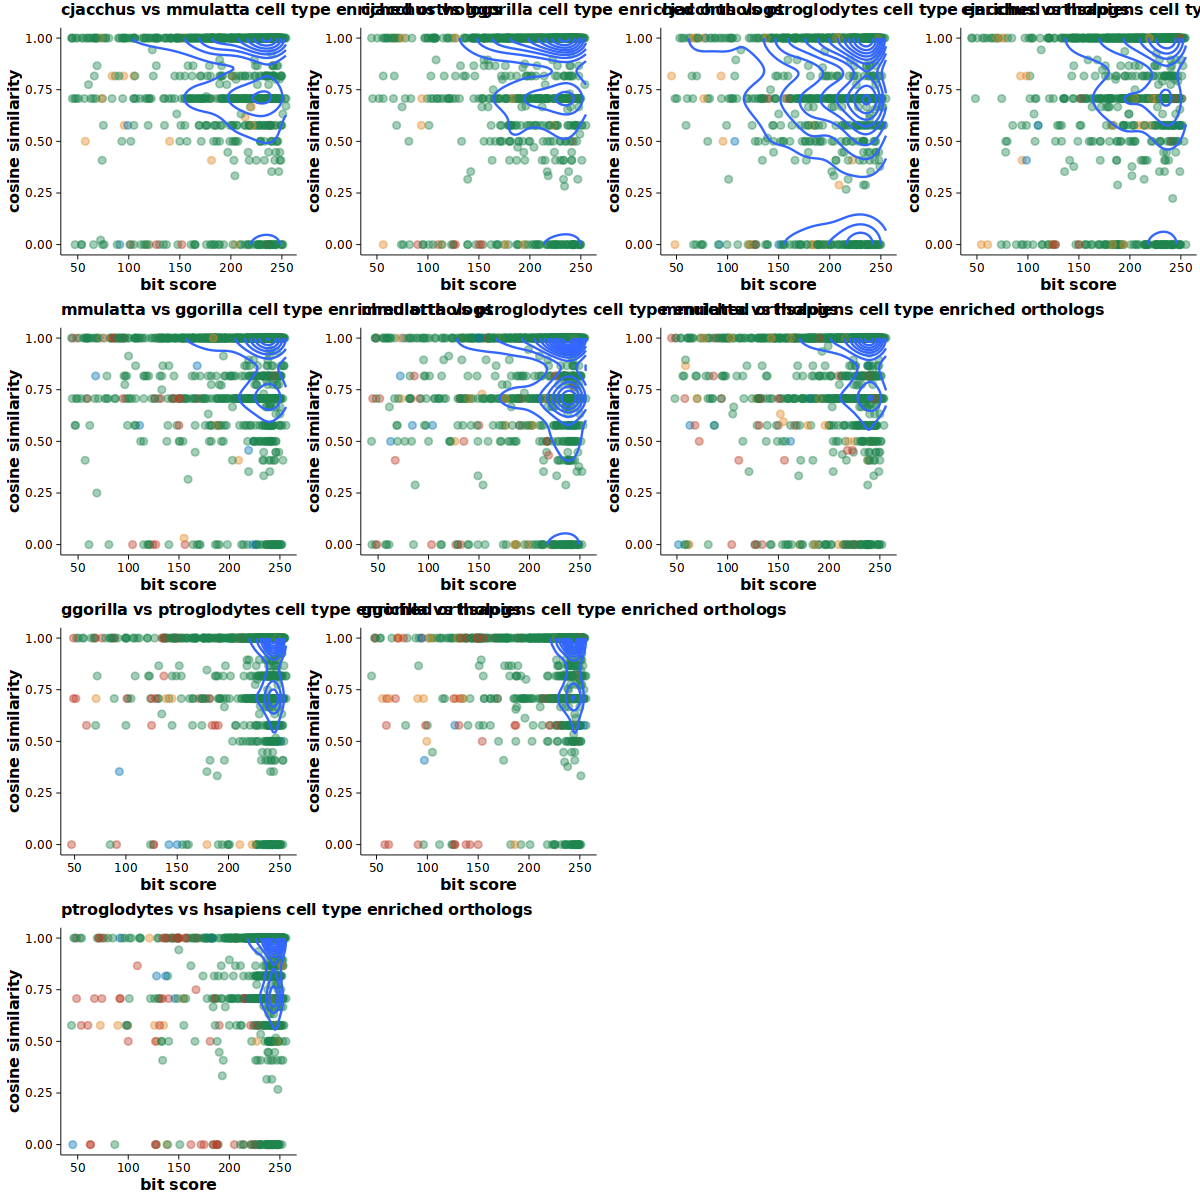

In [88]:
plot_grid(row_1, row_2, row_3, row_4, nrow = 4, align = 'v', axis = 'l')

In [89]:
pdf('all_species_paird_bit_vs_cosine.pdf', height = 10, width = 10)

plot_grid(row_1, row_2, row_3, row_4, nrow = 4, align = 'v', axis = 'l')

dev.off()

png 
  2

In [4]:
df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% 
            merge(df_all, by.x =  c("mm_peptide_id", "cj_peptide_id"), by.y = c("gene_mm", "gene_cj")) %>% 
                        rename("species_2_peptide_id" = "mm_peptide_id") %>% 
                        rename("species_1_peptide_id" = "cj_peptide_id") %>% 
            rename("e_value" = "X11") %>% rename("bit score" = 'X12') 

ERROR: Error in df_blast_new %>% select(X11, X12, mm_peptide_id, cj_peptide_id) %>% : could not find function "%>%"


In [10]:
row_1_new = plot_grid(fig_list[[4]] + theme(legend.position  = 'none'), 
          fig_list[[3]] + theme(legend.position  = 'none'), 
          fig_list[[2]] + theme(legend.position  = 'none'), 
          fig_list[[1]] + theme(legend.position  = 'none'), nrow = 1)

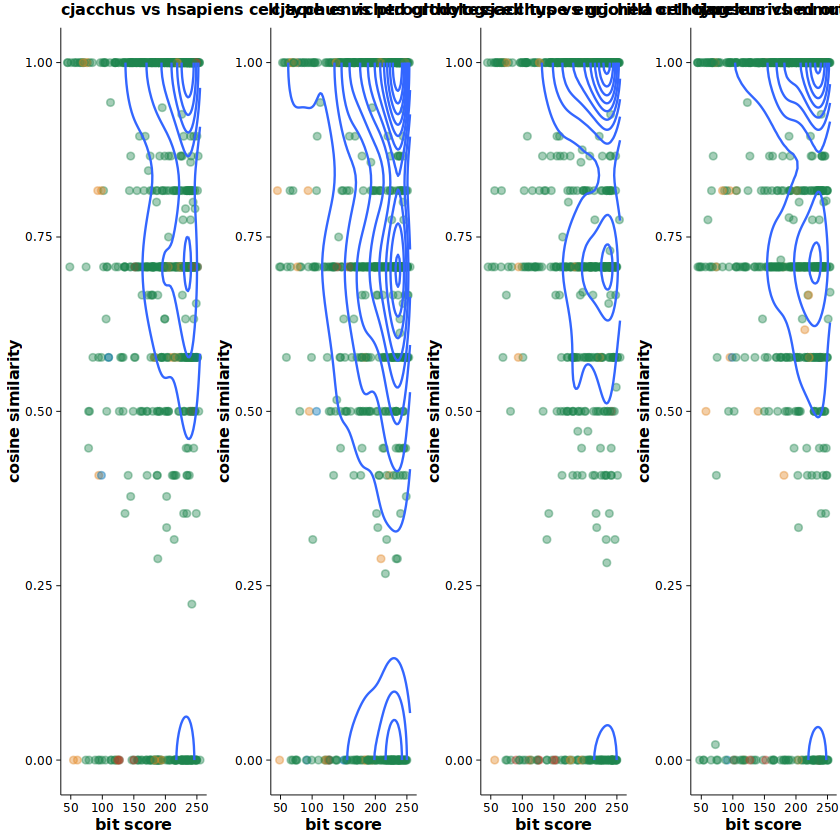

In [11]:
row_1_new

In [13]:
row_2_new = plot_grid(fig_list[[7]] + theme(legend.position  = 'none'), 
          fig_list[[6]] + theme(legend.position  = 'none'), 
          fig_list[[5]] + theme(legend.position  = 'none'),
          element_blank(), nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [14]:
row_3_new = plot_grid(fig_list[[9]] + theme(legend.position  = 'none'), 
          fig_list[[8]] + theme(legend.position  = 'none'), element_blank(),element_blank(),nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [15]:
row_4_new = plot_grid(fig_list[[10]] + theme(legend.position  = 'none'), element_blank(),element_blank(),element_blank(), nrow = 1)

Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”
Warning message in as_grob.default(plot):
“Cannot convert object of class element_blankelement into a grob.”


In [16]:
options(repr.plot.height = 10, repr.plot.width = 10)

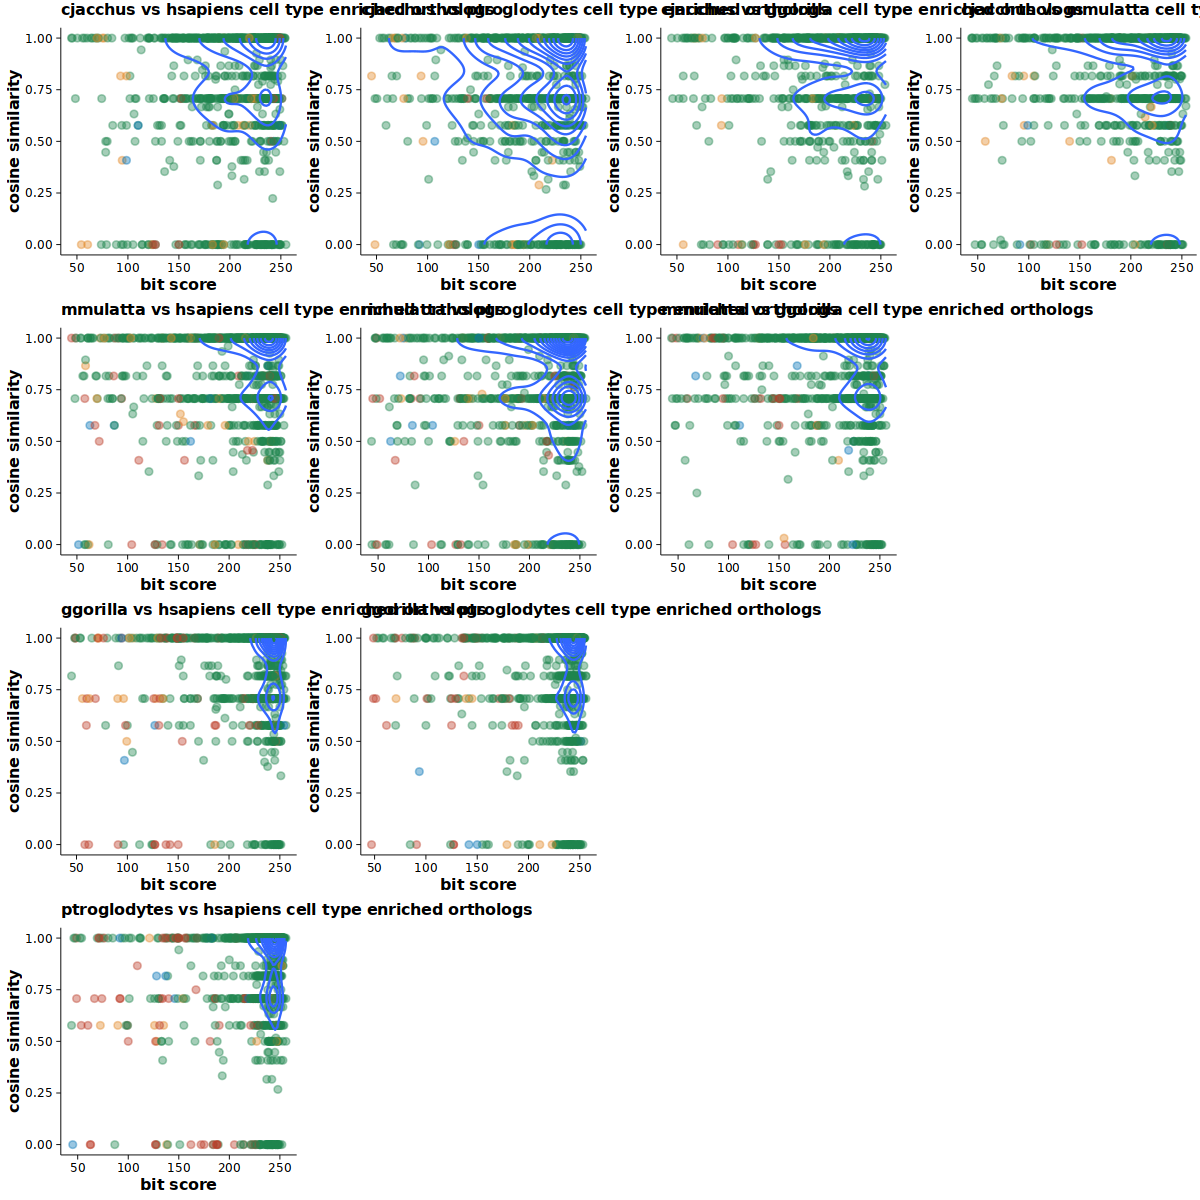

In [17]:
plot_grid(row_1_new, row_2_new, row_3_new, row_4_new, nrow = 4, align = 'v', axis = 'l')

In [19]:
pdf('all_species_paird_bit_vs_cosine_heatmap_order.pdf', height = 10, width = 10)

plot_grid(row_1_new, row_2_new, row_3_new, row_4_new, nrow = 4, align = 'v', axis = 'l')

dev.off()

png 
  2